<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Group-Project" data-toc-modified-id="Group-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Group Project</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Get-the-Data" data-toc-modified-id="Get-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Split-the-Train-and-Test-Set" data-toc-modified-id="Split-the-Train-and-Test-Set-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Split the Train and Test Set</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Fine-Tune-Model-1--Random-Forest" data-toc-modified-id="Fine-Tune-Model-1--Random-Forest-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Fine Tune Model 1- Random Forest</a></span></li><li><span><a href="#Fine-Tune-Model-2--LightGBM" data-toc-modified-id="Fine-Tune-Model-2--LightGBM-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Fine Tune Model 2- LightGBM</a></span></li><li><span><a href="#Fine-Tune-Model-3--Neural-Network" data-toc-modified-id="Fine-Tune-Model-3--Neural-Network-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Fine Tune Model 3- Neural Network</a></span></li><li><span><a href="#Three-Final-Models-AUC-Comparison" data-toc-modified-id="Three-Final-Models-AUC-Comparison-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Three Final Models AUC Comparison</a></span></li><li><span><a href="#Voting" data-toc-modified-id="Voting-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Voting</a></span></li></ul></div>

# Group Project


# Import Libraries
- Put all the important libraries together at the beginning to improve the readability, performance, and maintainability of the code

In [ ]:
import pandas as pd # data processing
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')# to make all the coding result more readable, ignnore the warning information
import matplotlib.pyplot as plt #import matplot to draw the figures
import seaborn as sns#import seaborn to draw the figures
from sklearn.preprocessing import StandardScaler# to scaler the attributes, import the StandardScaler to process
from sklearn.model_selection import train_test_split# to split the data into training and testing sets
from sklearn.feature_selection import RFE # used for feature selection

# Import necessary libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier # is used for ensembling multiple models

from sklearn import metrics #is imported for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score, confusion_matrix,classification_report


from sklearn.model_selection import GridSearchCV #is used for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE #is used for dealing with imbalanced datasets

from keras import backend as K
import tensorflow as tf

# Get the Data

In [ ]:
from pathlib import Path
df=pd.read_csv(Path('BankDataset.csv'))# use .read_csv() method to get the whole data

# Data Cleaning

## Check the missing values

In [ ]:
df.isnull().any()#check for any missing values in a pandas DataFrame

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

## Check the duplicated Values

In [ ]:
df.duplicated().sum()#check for any duplicated values in a pandas DataFrame

0

**Findings**
  - There is no missing and duplicated rows

# Preprocessing

## Categorical Analysis

In [ ]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].value_counts())


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

poutcome
unknown    36959
failur

**Findings**
- there are 10 columns are categorical columns
- `job` attribute has 12 types from the most to the least is blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown. 
- `marital` attribute has 3 types from the most to the least is married,single,divorced.
- `education` attribute has 4 types from the most to the least is secondary, tertiary,primary,unknown
- `default` attribute has 2 types from the most to the least is no,yes
-`housing` attribute has 2 types from the most to the least is yes,no
-`loan` attribute has 2 types from the most to the least is no,yes
- `contact` attribute has 3 types from the most to the least is cellular, unknown, telephone
- `month` attribute has 12 types from the most to the least is may,jul,aug,jun,nov,apr,feb,jan,oct,sep,mar,dec
-`poutcome` attribute has4 types from the most to the least is unknown,failure,other,success
-`y` attribute has 2 types from the most to the least is no,yes

## Process the Categorical Data

In [ ]:
#Process the target value
df['y']=df['y'].map({'no':0,'yes':1})#convert the string values 'no' and 'yes' to numerical values 0 and 1
df['loan'] = df['loan'].map({'yes' : 1, 'no': 0})
df['housing'] = df['housing'].map({'yes' : 1, 'no': 0})
df['default'] = df['default'].map({'yes' : 1, 'no': 0})

In [ ]:
# process the pdays data as the EDA shows,pday=-1 means the customer has never been contacted in previous marketing
# -1 in the pdays feature can have an influence on the performance of a classifier model, it may mistakenly use it in the model training process, which can lead to inaccurate predictions on new data
# replace -1 with 999 in pdays column
df['pdays'] = df['pdays'].replace(-1, 999)

In [ ]:
# Except for the target column `y`, use one-code algorithm to process the 9 categorical attributes
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
dummy_df = pd.get_dummies(df[cat_cols]).astype(float)
# Use get_dummies() function to convert each categorical column into a set of binary columns
#The resulting dummy variables are stored as a new DataFrame dummy_df
data = pd.concat([df, dummy_df], axis=1)# Use concat() function to concatenate df and the new dummy_df to new DataFrame data
data=data.drop(cat_cols, axis=1)# Use the drop() function to drop the original categorical columns 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  int64  
 6   duration             45211 non-null  float64
 7   campaign             45211 non-null  int64  
 8   pdays                45211 non-null  int64  
 9   previous             45211 non-null  int64  
 10  y                    45211 non-null  int64  
 11  job_admin.           45211 non-null  float64
 12  job_blue-collar      45211 non-null  float64
 13  job_entrepreneur     45211 non-null  float64
 14  job_housemaid        45211 non-null  float64
 15  job_management       45211 non-null 

**Finding**
- After processing the categorical data, there are 45211 entries and 49 columns.
- In order to further build the model, the next important step is to select feature
-Use the selected features for modeling and evaluation
 

# Feature Selection

- Feature selection is an important step in machine learning because it helps to improve model performance, reduce overfitting, and speed up training time. 
- In this case, we choose to use RFE to select the BEST 40 features, and then calculate the correlation(Pearson coefficient) between features to help further filter features and remove feature values that are too correlated.








In [ ]:
# Separate the target variable from the input features 
X=data.drop(['y'],axis=1)#assign all the columns except 'y' to variable 'X' 
y=data['y']# assign the  target variable 'y' 

- In this case, we choose to use RFE(Recursive Feature Elimination) to educe the number of features in this dataset
- The reason for using RFE instead of PCA is that RFE takes into account the relationship between the features and the target variable, while PCA only considers the variance of the features.  
- The below code is performing RFE using Gradient Boosting Classifier as an estimator to select the top 40 features. 

In [ ]:
#This code may take 2 minutes to process
estimator = GradientBoostingClassifier()# create an GradientBoostingClassifier model to evaluate the importance of each feature
rfe = RFE(estimator, n_features_to_select=40) #creates an instance of RFE with the estimator and specifies the number of features to select, which is 40 in this case.
rfe.fit(X, y)# fit the RFE model on the input data X and target variable y
print(rfe.ranking_)#prints the ranking of each feature

[1 8 1 1 1 1 1 1 1 1 1 1 2 9 1 1 3 1 1 1 4 5 6 1 1 1 7 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
selected_features = X.columns[rfe.support_] #rfe.support_ returns a boolean mask of the selected features
selected_features

Index(['age', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_management',
       'job_retired', 'job_services', 'job_student', 'job_technician',
       'marital_married', 'marital_single', 'education_primary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

<Axes: >

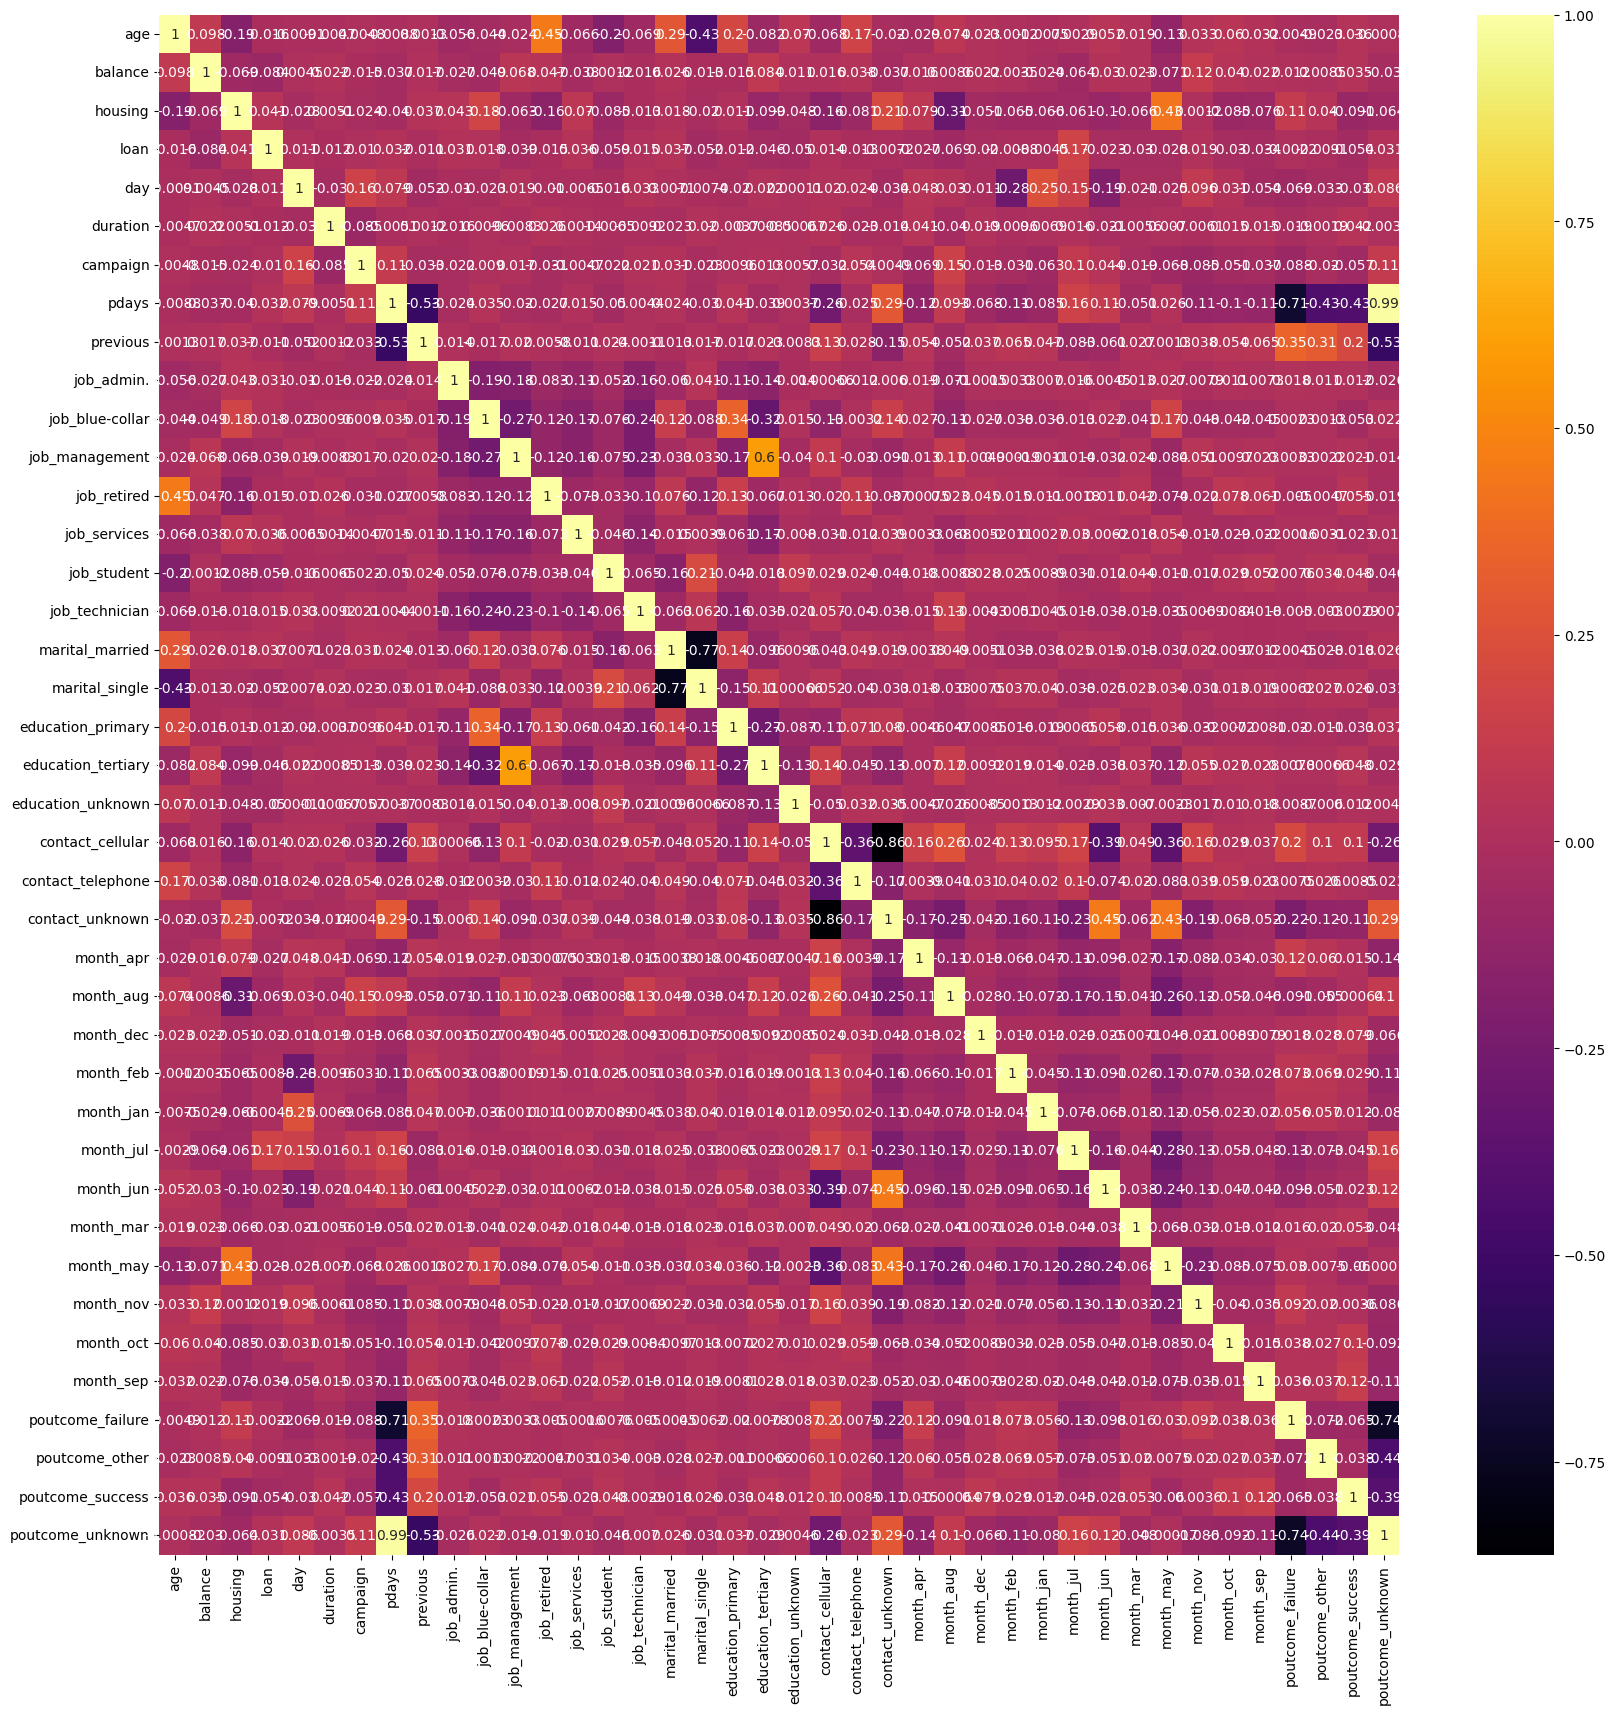

In [ ]:
data_selected=data[selected_features]# create a new dataframe data_selected that includes only those features
corr_matrix = data_selected.corr(method='pearson')# Calculate the Pearson correlation coefficients
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)#define a specified size of 20x20 
sns.heatmap(data_selected.corr(), annot=True, cmap='inferno')
#use the sns.heatmap method, with the correlation matrix as the input data, annot=True to display the correlation values on the heatmap, and the cmap parameter set to 'inferno' to specify the color scheme.

In [ ]:
# Remove features with high correlation coefficient
threshold = 0.8 # Set the threshold for correlation coefficient
for i in range(len(corr_matrix.columns)): #define a loop function to check for each pair of features if their absolute correlation coefficient value is greater than the threshold or not.
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >threshold: 
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_i in selected_features and colname_j in selected_features:
                if abs(corr_matrix[colname_i]).mean() > abs(corr_matrix[colname_j]).mean():
                    selected_features = selected_features.drop([colname_i])
                else:
                    selected_features = selected_features.drop([colname_j])
                    
# Use the selected features for further analysis
X_selected = X[selected_features]

In [ ]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 45211 non-null  int64  
 1   balance             45211 non-null  int64  
 2   housing             45211 non-null  int64  
 3   loan                45211 non-null  int64  
 4   day                 45211 non-null  int64  
 5   duration            45211 non-null  float64
 6   campaign            45211 non-null  int64  
 7   previous            45211 non-null  int64  
 8   job_admin.          45211 non-null  float64
 9   job_blue-collar     45211 non-null  float64
 10  job_management      45211 non-null  float64
 11  job_retired         45211 non-null  float64
 12  job_services        45211 non-null  float64
 13  job_student         45211 non-null  float64
 14  job_technician      45211 non-null  float64
 15  marital_married     45211 non-null  float64
 16  mari

**Results of the Feature Selection**
- There are 39 columns left after the RFE feature selection and eliminate those with high Pearson coefficient correlation

# Split the Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2, random_state=42)
#split the selected features (X_selected) and the target variable (y) into training and testing sets
#The test_size is set to 0.2, which means that 20% of the data will be used for testing

In [ ]:
X_train.shape

(36168, 38)

In [ ]:
cols=X_train.columns# to store all X_train columns
sc = StandardScaler() # use the `StandardScaler() function to scale the features
X_train = sc.fit_transform(X_train) # use the fit_transform() method to apply X_train
X_test=sc.fit_transform(X_test)# X_test also need to be scaled

# Model Selection 

In [ ]:
# first to define a function to evaluate the model caculating accuracy, precision,recall,f1
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis].round(2)

     # Create dictionary with evaluation results
    eval_result = {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc,'cm%': cm_percent,'classification_report': class_report,'y_pred_proba': y_pred_proba} # <-- add predicted probabilities to dictionary
    
    return eval_result

- Model Evaluation Metrics Interpretation
  - **Accuracy**: measures the proportion of correct predictions made by the model out of all predictions. It is a commonly used metric for balanced datasets where the classes are evenly distributed.

  - **Precision**: measures the proportion of true positives out of all predicted positives. It is a metric that focuses on minimizing false positives and is useful in situations where false positives are costly.

  - **Recall**: measures the proportion of true positives out of all actual positives. It is a metric that focuses on minimizing false negatives and is useful in situations where false negatives are costly.

  - **F1-score**: is the harmonic mean of precision and recall, providing a single metric that balances both metrics. It is useful when both precision and recall are important.

  - **ROC-AUC**: measures the ability of the model to distinguish between positive and negative classes by plotting the true positive rate against the false positive rate at different classification thresholds. It is useful when the distribution of classes is imbalanced, and the model needs to have a high true positive rate while keeping the false positive rate low.
- In this case of an imbalanced dataset where the objective is to predict whether the client will receive a deposit or not, we focus on metrics that are more robust to class imbalance: recall and ROC-AUC

In [ ]:
# Define the models to use
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
    'SGDClassifier':SGDClassifier(loss='log',random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVCModel':SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto',probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)
}
# Create a list to hold the results
results = []

# Loop over the models and fit them on the training data
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    eval_result = evaluate_model(model, X_test, y_test)
    
    # Append the results to the list
    results.append({
        'Model': name,
        'Accuracy': eval_result['acc'],
        'Precision': eval_result['prec'],
        'Recall': eval_result['rec'],
        'F1 Score': eval_result['f1'],
        'AUC': eval_result['auc']
    })

In [ ]:
# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Display the results
print(df_results)

                        Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.902466   0.656410  0.360563  0.465455   
1      DecisionTreeClassifier  0.877806   0.481785  0.496714  0.489135   
2               SGDClassifier  0.902024   0.666048  0.337089  0.447631   
3        KNeighborsClassifier  0.891739   0.566154  0.345540  0.429155   
4                    SVCModel  0.796417   0.166667  0.182160  0.174069   
5               Random Forest  0.904899   0.653214  0.410329  0.504037   
6                     XGBoost  0.907000   0.633333  0.499531  0.558530   
7  GradientBoostingClassifier  0.905562   0.652237  0.424413  0.514221   
8                    LightGBM  0.906336   0.631010  0.492958  0.553506   
9                         MLP  0.902577   0.616751  0.456338  0.524555   

        AUC  
0  0.909175  
1  0.712696  
2  0.899930  
3  0.816464  
4  0.605115  
5  0.930822  
6  0.928084  
7  0.925694  
8  0.931842  
9  0.929215  


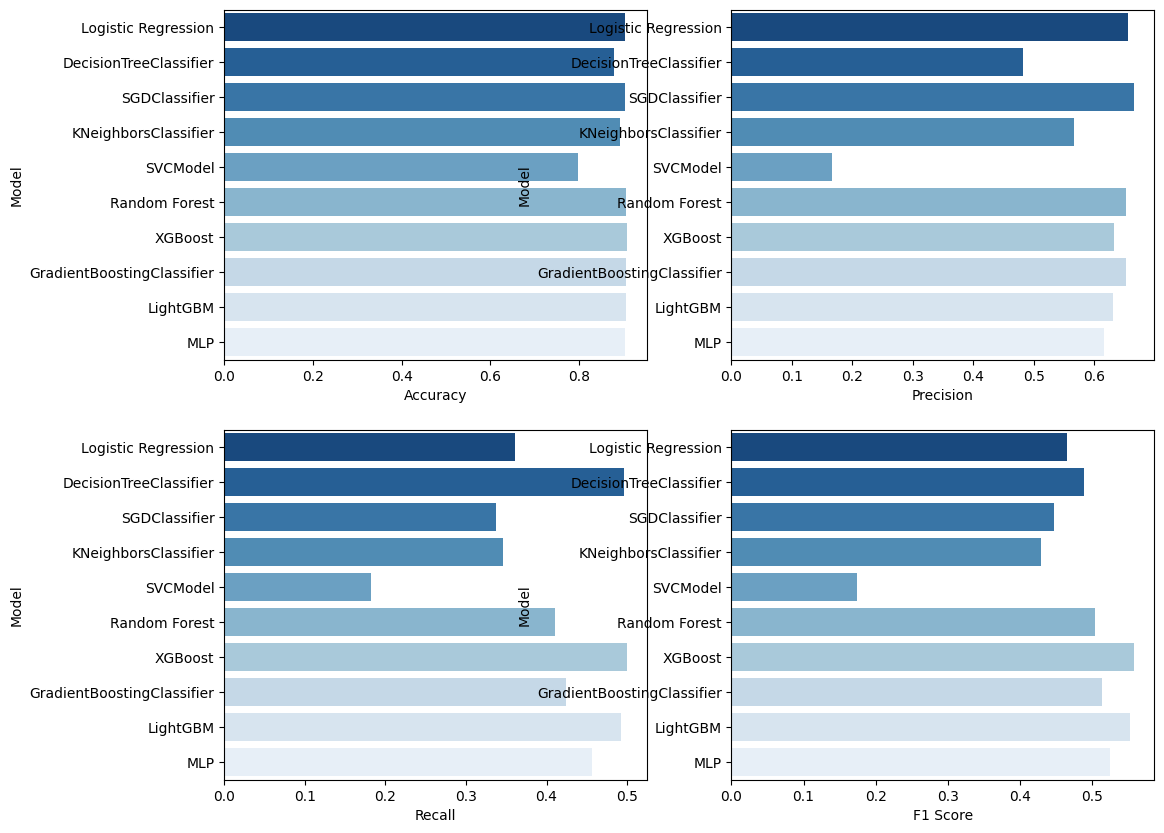

In [ ]:
# Plot the evaluation metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    row = i // 2
    col = i % 2
    sns.barplot(x=metric, y='Model', data=df_results.reset_index(), ax=axes[row, col], palette='Blues_r')
    axes[row, col].set_xlabel(metric)

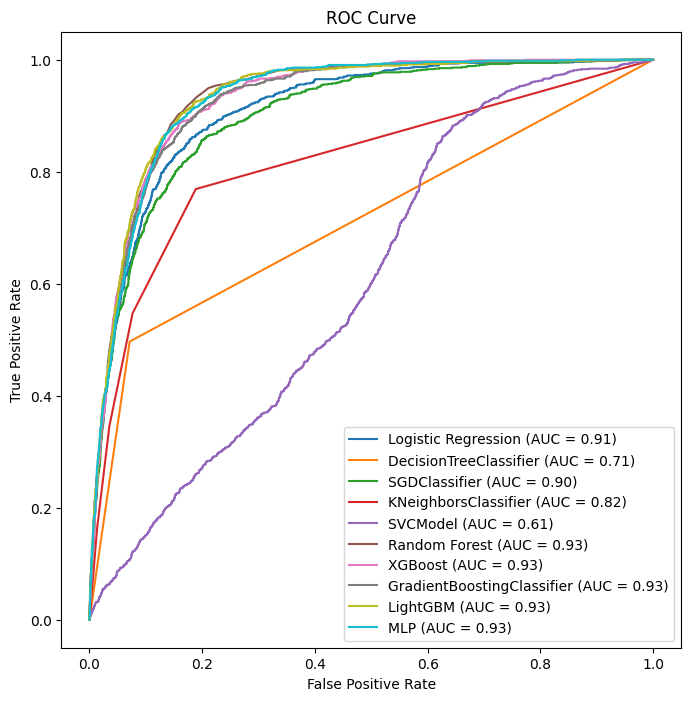

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

for name, model in models.items():
    eval_result = evaluate_model(model, X_test, y_test)
    fpr, tpr, _ = roc_curve(y_test, eval_result['y_pred_proba'])
    auc = roc_auc_score(y_test, eval_result['y_pred_proba'])
    ax.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Set plot title and axis labels
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()


**Analysis of Model Selection**
- In this case, in order to provide the best performance model, firstly, we tried 10 common classification models with default parameters.
- We choose the best models by considering all the metrics, first is Random Forest, second is LightGBM, Third is MLP


# Fine Tune Model 1- Random Forest

## Use Random Search 

In [ ]:
# hint: this code may take 4 minutes to run, so we hide this running code to save time, just run the next code with the best parameters
# Define the hyperparameters to search over
#param_dist = {'n_estimators': [100, 500, 1000],
#              'max_features': ['auto', 'sqrt'],
#              'max_depth': [5, 10, 20, 30, None],
#              'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]}

# Create a Random Forest classifier
#rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object with 5-fold cross-validation
#rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5,
#                              cv=5, scoring='f1', random_state=42, n_jobs=-1)# use scoring='f1' instead of scoring='accuracy'

# Fit the RandomizedSearchCV object to the data
#rf_random.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
#print("Best Hyperparameters: ", rf_random.best_params_)
#print("Best Score: ", rf_random.best_score_)


**Why we use scoring='f1',not scoring='accuracy'**
- F1-score is the harmonic mean of precision and recall and is a good metric to use when there is an imbalance in the dataset. 
- In this bank dataset classification where the positive class is rare, accuracy can be misleading as a metric because a model that always predicts the negative class would achieve a high accuracy. Therefore, optimizing for F1-score, which considers both precision and recall, would be more appropriate.
- Use scoring='f1' instead of scoring='accuracy' can help to fine-tune the model better for classification problems, especially when the dataset is imbalanced.

In [ ]:
model_rf=RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [ ]:
# Evaluate Model
rf_eval = evaluate_model(model_rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('cm percent:', rf_eval['cm%'])
print(rf_eval['classification_report'])

Accuracy: 0.9060046444763906
Precision: 0.6742301458670988
Recall: 0.39061032863849765
F1 Score: 0.4946492271105827
Area Under Curve: 0.9350727411178864
cm percent: [[0.97480572 0.02519428]
 [0.60938967 0.39061033]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7978
           1       0.67      0.39      0.49      1065

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



In [ ]:
importances = model_rf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print the feature importances along with the corresponding feature names
for feature in range(X_train.shape[1]):
    print(f"{X.columns[sorted_idx[feature]]}: {importances[sorted_idx[feature]]}")

day: 0.3166256083270218
age: 0.08178111833295965
month_jan: 0.08093472453285688
default: 0.08015866720557391
loan: 0.07420102778152843
duration: 0.02990788987013346
campaign: 0.027554213332595844
balance: 0.026768919310317735
contact_cellular: 0.019300089297748044
job_unemployed: 0.016849498222972575
month_jul: 0.015206443135432157
month_apr: 0.015181716238867264
marital_divorced: 0.014624978527881657
education_unknown: 0.012971011850452874
month_aug: 0.011836258958997157
contact_telephone: 0.01110497274491081
month_dec: 0.010780846656908373
job_student: 0.010011510668227246
marital_married: 0.009964588972973969
job_retired: 0.009205823584759716
education_tertiary: 0.008647841162030047
education_primary: 0.008573856173099853
job_management: 0.008473962398269896
job_admin.: 0.008393486009386145
housing: 0.008344248344252216
job_self-employed: 0.008012169897033666
contact_unknown: 0.007845137973349264
pdays: 0.007625582734606473
previous: 0.007510074833454238
job_services: 0.006756939008

**Results Analysis**
- After random search, we find the best hyperparameters for Model 1(model_rf)
- The result shows that Accuracy is 0.91, Precision 0.69, Recall:0.4, F1 Score is 0.5, AUC is highly to 0.935
- Advantage of Model 1 is AUC is higher
- Disadvantage of Model 1 is for "1" prediction, precision, recall, f1-score are not high because of the whole dataset is imbalanced

## Alleviate Imbalance in Random Forest

In [ ]:
# Use SMOTE method to cope with imbalanced dataset
# Oversample the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

0    31944
1    31944
Name: y, dtype: int64


In [ ]:
# build a new model to train the oversampled training dataset
model_rf_smote=RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',random_state=42)
model_rf_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [ ]:
# Evaluate the resampled training Model
rf_resampled_eval = evaluate_model(model_rf_smote, X_test, y_test)

# Print result
print('Accuracy:', rf_resampled_eval['acc'])
print('Precision:', rf_resampled_eval['prec'])
print('Recall:', rf_resampled_eval['rec'])
print('F1 Score:', rf_resampled_eval['f1'])
print('Area Under Curve:', rf_resampled_eval['auc'])
print('cm percent:', rf_resampled_eval['cm%'])
print(rf_resampled_eval['classification_report'])

Accuracy: 0.5918389914851266
Precision: 0.2186026575225032
Recall: 0.9577464788732394
F1 Score: 0.35595882045018323
Area Under Curve: 0.8778861352286864
cm percent: [[0.54299323 0.45700677]
 [0.04225352 0.95774648]]
              precision    recall  f1-score   support

           0       0.99      0.54      0.70      7978
           1       0.22      0.96      0.36      1065

    accuracy                           0.59      9043
   macro avg       0.60      0.75      0.53      9043
weighted avg       0.90      0.59      0.66      9043



## Compare models before and after the smote method

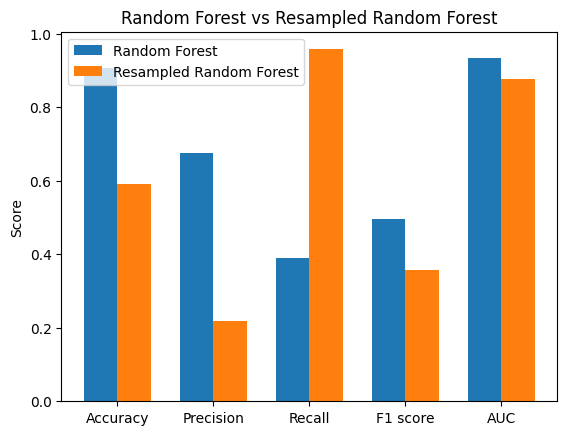

In [ ]:
# Create lists for evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']
rf_scores = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['auc']]
rf_resampled_scores = [rf_resampled_eval['acc'], rf_resampled_eval['prec'], rf_resampled_eval['rec'], rf_resampled_eval['f1'], rf_resampled_eval['auc']]

# Set bar chart settings
x = np.arange(len(labels))
width = 0.35

# Create bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest')
rects2 = ax.bar(x + width/2, rf_resampled_scores, width, label='Resampled Random Forest')

# Add chart titles and labels
ax.set_ylabel('Score')
ax.set_title('Random Forest vs Resampled Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the chart
plt.show()

**Results Analysis**
- Advantage:when using oversampling SMOTE method, Recall value is increased to 0.96, however the AUC value is slightly reduced to 0.88
-  In this context, recall would measure the proportion of correctly predicted instances where the client received a deposit among all instances where the client actually received a deposit. 

# Fine Tune Model 2- LightGBM

## Use Grid Search

In [ ]:
# Use the Grid Search to fine tune the LightGBM model
# Define the LightGBM model
#model_lgb = lgb.LGBMClassifier()

# Define the hyperparameter grid to search over
#param_grid = {
#    'learning_rate': [0.05, 0.1, 0.2],
#   'n_estimators': [50, 100, 200],
#    'max_depth': [3, 4, 5],
#   'num_leaves': [7, 15, 31],
#}

# Create the GridSearchCV object
#grid_search = GridSearchCV(model_lgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

# Fit the GridSearchCV object to the training data
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
#print("Best hyperparameters: ", grid_search.best_params_)
#print("Best accuracy score: ", grid_search.best_score_)


In [ ]:
model_lgb=lgb.LGBMClassifier(n_estimators=200,max_depth=5,learning_rate=0.2,num_leaves=31,random_state=42)
model_lgb.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
               random_state=42)

In [ ]:
# Evaluate Model
lgb_eval = evaluate_model(model_lgb, X_test, y_test)

# Print result
print('Accuracy:', lgb_eval['acc'])
print('Precision:', lgb_eval['prec'])
print('Recall:', lgb_eval['rec'])
print('F1 Score:', lgb_eval['f1'])
print('Area Under Curve:', lgb_eval['auc'])
print('cm percent:', lgb_eval['cm%'])
print(lgb_eval['classification_report'])

Accuracy: 0.9041247373659184
Precision: 0.6195652173913043
Recall: 0.48169014084507045
F1 Score: 0.5419968304278923
Area Under Curve: 0.930986503965718
cm percent: [[0.96051642 0.03948358]
 [0.51830986 0.48169014]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7978
           1       0.62      0.48      0.54      1065

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.90      0.90      0.90      9043



**Results Analysis**
- Accuracy 0.91, Precision 0.65, recall 0.49, F1 Score 0.55, AUC is 0.929
-Advantage is that model_lgb Recall is better than model_rf(before dealing with imbalance dataset)
- Diadvantage:  model_lgb precision and AUC is slightly less than model_rf(before dealing with imbalance dataset)

## Alleviate Imbalance in LightGBM

In [ ]:
#Adjust category weights
neg_samples = len(y_train[y_train == 0])
pos_samples = len(y_train[y_train == 1])
ratio = float(neg_samples) / pos_samples
class_weights = {0: 1.0, 1: ratio}
model_lgb_class=lgb.LGBMClassifier(n_estimators=200,max_depth=5,learning_rate=0.2,num_leaves=31,random_state=42,class_weight=class_weights)
model_lgb_class.fit(X_train, y_train)

LGBMClassifier(class_weight={0: 1.0, 1: 7.5625}, learning_rate=0.2, max_depth=5,
               n_estimators=200, random_state=42)

In [ ]:
# Evaluate Model
lgb_eval_classweights = evaluate_model(model_lgb_class, X_test, y_test)

# Print result
print('Accuracy:', lgb_eval_classweights['acc'])
print('Precision:', lgb_eval_classweights['prec'])
print('Recall:', lgb_eval_classweights['rec'])
print('F1 Score:', lgb_eval_classweights['f1'])
print('Area Under Curve:', lgb_eval_classweights['auc'])
print('cm percent:', lgb_eval_classweights['cm%'])
print(lgb_eval_classweights['classification_report'])

Accuracy: 0.8738250580559549
Precision: 0.4791666666666667
Recall: 0.8206572769953052
F1 Score: 0.6050536517826237
Area Under Curve: 0.9265655435075565
cm percent: [[0.88092254 0.11907746]
 [0.17934272 0.82065728]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7978
           1       0.48      0.82      0.61      1065

    accuracy                           0.87      9043
   macro avg       0.73      0.85      0.76      9043
weighted avg       0.92      0.87      0.89      9043



## Compare models before and after alleviating imbalance

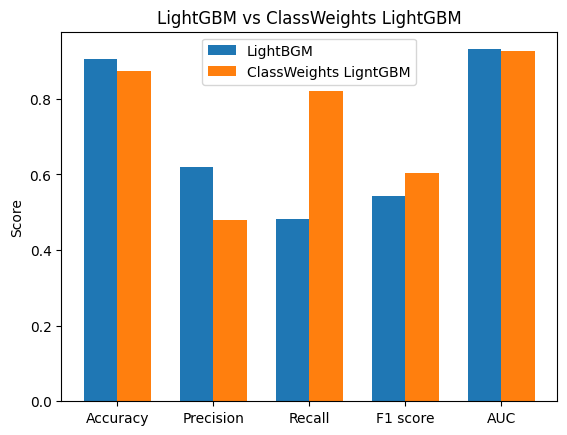

In [ ]:
# Create lists for evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']
lgb_scores = [lgb_eval['acc'], lgb_eval['prec'], lgb_eval['rec'], lgb_eval['f1'], lgb_eval['auc']]
lgb_new_scores = [lgb_eval_classweights['acc'], lgb_eval_classweights['prec'], lgb_eval_classweights['rec'], lgb_eval_classweights['f1'],lgb_eval_classweights['auc']]

# Set bar chart settings
x = np.arange(len(labels))
width = 0.35

# Create bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightBGM')
rects2 = ax.bar(x + width/2, lgb_new_scores, width, label='ClassWeights LigntGBM')

# Add chart titles and labels
ax.set_ylabel('Score')
ax.set_title('LightGBM vs ClassWeights LightGBM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the chart
plt.show()

**Results Analysis**
- Advantage:when using adjusting the weights proportion in lighgbm model, Recall value is increased to 0.82, however the AUC value is slightly reduced to 0.927
- When comparing lightgbm model with Random Forest after alleviating the imbalance, Lightgbm Model's AUC is higher

# Fine Tune Model 3- Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Build the model
model_mlp = Sequential()
model_mlp.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(1, activation='sigmoid'))

# Compile the model
model_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_mlp.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the testing set
score = model_mlp.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
905/905 [==============================] - 4s 4ms/step - loss: 0.2523 - accuracy: 0.8955 - val_loss: 0.2153 - val_accuracy: 0.9013
Epoch 2/50
905/905 [==============================] - 3s 3ms/step - loss: 0.2216 - accuracy: 0.9011 - val_loss: 0.2110 - val_accuracy: 0.9043
Epoch 3/50
905/905 [==============================] - 4s 4ms/step - loss: 0.2146 - accuracy: 0.9014 - val_loss: 0.2080 - val_accuracy: 0.9054
Epoch 4/50
905/905 [==============================] - 3s 3ms/step - loss: 0.2095 - accuracy: 0.9026 - val_loss: 0.2094 - val_accuracy: 0.9039
Epoch 5/50
905/905 [==============================] - 2s 3ms/step - loss: 0.2073 - accuracy: 0.9060 - val_loss: 0.2072 - val_accuracy: 0.9079
Epoch 6/50
905/905 [==============================] - 3s 3ms/step - loss: 0.2042 - accuracy: 0.9064 - val_loss: 0.2030 - val_accuracy: 0.9086
Epoch 7/50
905/905 [==============================] - 3s 3ms/step - loss: 0.2015 - accuracy: 0.9079 - val_loss: 0.2028 - val_accuracy: 0.9088
Epoch 

In [ ]:
# Make predictions on the testing set
y_pred = model_mlp.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', auc)
print(classification_report(y_test, y_pred_classes))

283/283 [==============================] - 0s 1ms/step
Accuracy: 0.8992590954329316
Precision: 0.5792181069958847
Recall: 0.5286384976525822
F1 score: 0.5527736867943054
ROC AUC score: 0.9215349841171202
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7978
           1       0.58      0.53      0.55      1065

    accuracy                           0.90      9043
   macro avg       0.76      0.74      0.75      9043
weighted avg       0.90      0.90      0.90      9043



## Alleviate Imbalance in Neural Network

In [ ]:
# define a weighted_binary_crossentropy to alleviate the imbalance in neural network
from keras import backend as K
import tensorflow as tf

def weighted_binary_crossentropy(y_true, y_pred):
    """
    Weighted binary crossentropy loss function.
    """
    # Define weights for each class
    class_weight = {0: 1, 1: 10} # higher weight for minority class
    
    # Calculate binary crossentropy loss
    bce = K.binary_crossentropy(y_true, y_pred)
    
    # Apply class weights
    weight_vector = y_true * class_weight[1] + (1. - y_true) * class_weight[0]
    weighted_bce = weight_vector * bce
    
    # Return weighted binary crossentropy loss
    return K.mean(weighted_bce)
# Cast the y input to float32
y_float = tf.cast(y_train, tf.float32)


# Build the model
model_mlp_weighted = Sequential()
model_mlp_weighted.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_mlp_weighted.add(Dropout(0.2))
model_mlp_weighted.add(Dense(64, activation='relu'))
model_mlp_weighted.add(Dropout(0.2))
model_mlp_weighted.add(Dense(32, activation='relu'))
model_mlp_weighted.add(Dropout(0.2))
model_mlp_weighted.add(Dense(1, activation='sigmoid'))

# Compile the model with custom loss function
model_mlp_weighted.compile(loss=weighted_binary_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_mlp_weighted.fit(X_train, y_float, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
905/905 [==============================] - 5s 4ms/step - loss: 0.8770 - accuracy: 0.7502 - val_loss: 0.7088 - val_accuracy: 0.7826
Epoch 2/50
905/905 [==============================] - 3s 3ms/step - loss: 0.7493 - accuracy: 0.7773 - val_loss: 0.6924 - val_accuracy: 0.7799
Epoch 3/50
905/905 [==============================] - 3s 3ms/step - loss: 0.7135 - accuracy: 0.7893 - val_loss: 0.6912 - val_accuracy: 0.8108
Epoch 4/50
905/905 [==============================] - 3s 3ms/step - loss: 0.7002 - accuracy: 0.7928 - val_loss: 0.6797 - val_accuracy: 0.7976
Epoch 5/50
905/905 [==============================] - 3s 3ms/step - loss: 0.6763 - accuracy: 0.8036 - val_loss: 0.6864 - val_accuracy: 0.7989
Epoch 6/50
905/905 [==============================] - 3s 4ms/step - loss: 0.6693 - accuracy: 0.8014 - val_loss: 0.6709 - val_accuracy: 0.7954
Epoch 7/50
905/905 [==============================] - 3s 3ms/step - loss: 0.6513 - accuracy: 0.8041 - val_loss: 0.6711 - val_accuracy: 0.8153
Epoch 

- To solve the problem of imbalanced dataset in neural network, we define a custom loss function assigns a higher weight to the minority class by setting the weight of class 1 to 10, while keeping the weight of class 0 at 1. 
- During training, this will result in higher penalties for misclassifying samples in the minority class, which can help improve the model's performance on imbalanced data.

In [ ]:
# Make predictions on the testing set
y_pred = model_mlp_weighted.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy_after = accuracy_score(y_test, y_pred_classes)
precision_after = precision_score(y_test, y_pred_classes)
recall_after = recall_score(y_test, y_pred_classes)
f1_after = f1_score(y_test, y_pred_classes)
auc_after = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy_after)
print('Precision:', precision_after)
print('Recall:', recall_after)
print('F1 score:', f1_after)
print('ROC AUC score:', auc_after)
print(classification_report(y_test, y_pred_classes))

283/283 [==============================] - 1s 2ms/step
Accuracy: 0.8406502266946809
Precision: 0.4159964253798034
Recall: 0.8741784037558685
F1 score: 0.5637299424765364
ROC AUC score: 0.9244646957536984
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7978
           1       0.42      0.87      0.56      1065

    accuracy                           0.84      9043
   macro avg       0.70      0.86      0.73      9043
weighted avg       0.91      0.84      0.86      9043



## Compare models before and after alleviating imbalance

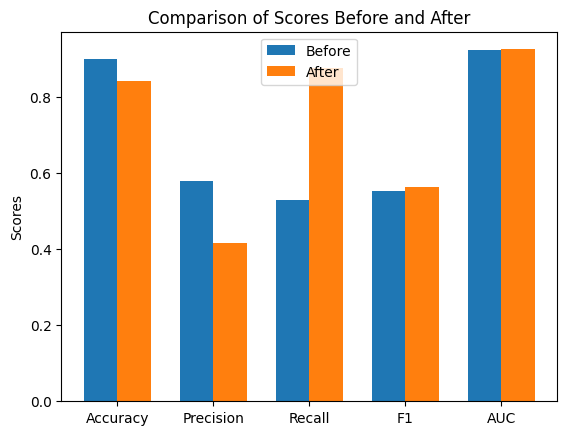

In [ ]:
# Define the scores for the two models
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
before_scores = [accuracy, precision, recall, f1, auc]
after_scores = [accuracy_after, precision_after, recall_after, f1_after, auc_after]

# Define the positions of the bars
x = np.arange(len(labels))
width = 0.35

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_scores, width, label='Before')
rects2 = ax.bar(x + width/2, after_scores, width, label='After')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Scores Before and After')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Three Final Models AUC Comparison

In the end, we compare the three models after alleviating imbalance

283/283 [==============================] - 0s 1ms/step


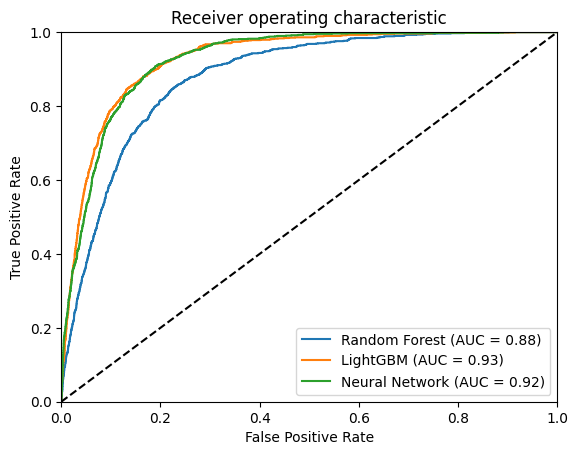

In [ ]:

# Make predictions using the models
y_prob_rf = model_rf_smote.predict_proba(X_test)[:, 1]
y_prob_lgb = model_lgb_class.predict_proba(X_test)[:, 1]
y_prob_mlp = model_mlp_weighted.predict(X_test)

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_prob_lgb)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_prob_mlp)

# Calculate the AUC for the ROC curve
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_lgb = roc_auc_score(y_test, y_prob_lgb)
auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Plot the ROC curves
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM (AUC = %0.2f)' % auc_lgb)
plt.plot(fpr_mlp, tpr_mlp, label='Neural Network (AUC = %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Voting 

In [ ]:
# Initialize the Voting Classifier
voting_clf= VotingClassifier(
    estimators=[('rf', model_rf_smote), ('lgbm', model_lgb_class)],
    voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Get the predictions
y_pred_voting = voting_clf.predict(X_test)

In [ ]:
# Evaluate Model
voting_clf_eval = evaluate_model(voting_clf, X_test, y_test)
# Print result
print('Accuracy:', voting_clf_eval['acc'])
print('Precision:', voting_clf_eval['prec'])
print('Recall:', voting_clf_eval['rec'])
print('F1 Score:', voting_clf_eval['f1'])
print('Area Under Curve:', voting_clf_eval['auc'])
print('cm percent:', voting_clf_eval['cm%'])
print(voting_clf_eval['classification_report'])

Accuracy: 0.9016919163994249
Precision: 0.5634005763688761
Recall: 0.7342723004694836
F1 Score: 0.6375866286180187
Area Under Curve: 0.9354006381398612
cm percent: [[0.92404111 0.07595889]
 [0.2657277  0.7342723 ]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7978
           1       0.56      0.73      0.64      1065

    accuracy                           0.90      9043
   macro avg       0.76      0.83      0.79      9043
weighted avg       0.92      0.90      0.91      9043



In [ ]:
#Final Comparison
# Scores for model_rf
rf = {'Accuracy': rf_eval['acc'],
             'Precision': rf_eval['prec'],
             'Recall': rf_eval['rec'],
             'F1 Score': rf_eval['f1'],
             'Area Under Curve': rf_eval['auc']}

# Scores for model_lgb_class
lgb= {'Accuracy': lgb_eval['acc'],
              'Precision': lgb_eval['prec'],
              'Recall': lgb_eval['rec'],
              'F1 Score': lgb_eval['f1'],
              'Area Under Curve': lgb_eval['auc']}

# Scores for model_mlp_weighted
mlp = {'Accuracy': accuracy,
              'Precision': precision,
              'Recall': recall,
              'F1 Score': f1,
              'Area Under Curve': auc}



# Scores for model_rf_smote
rf_scores = {'Accuracy': rf_resampled_eval['acc'],
             'Precision': rf_resampled_eval['prec'],
             'Recall': rf_resampled_eval['rec'],
             'F1 Score': rf_resampled_eval['f1'],
             'Area Under Curve': rf_resampled_eval['auc']}

# Scores for model_lgb_class
lgb_scores = {'Accuracy': lgb_eval_classweights['acc'],
              'Precision': lgb_eval_classweights['prec'],
              'Recall': lgb_eval_classweights['rec'],
              'F1 Score': lgb_eval_classweights['f1'],
              'Area Under Curve': lgb_eval_classweights['auc']}

# Scores for model_mlp_weighted
mlp_scores = {'Accuracy': accuracy_after,
              'Precision': precision_after,
              'Recall': recall_after,
              'F1 Score': f1_after,
              'Area Under Curve': auc_after}

# Scores for Voting
voting_scores= {'Accuracy': voting_clf_eval['acc'],
              'Precision': voting_clf_eval['prec'],
              'Recall': voting_clf_eval['rec'],
              'F1 Score': voting_clf_eval['f1'],
              'Area Under Curve': voting_clf_eval['auc']}

# Create the DataFrame
scores_df = pd.DataFrame({'Random Forest Before': rf,
                          'LightGBM Before': lgb,
                          'MLP Before': mlp,
                          'Random Forest (SMOTE)': rf_scores,
                          'LightGBM (Class Weights)': lgb_scores,
                          'MLP (Weighted)': mlp_scores,
                          'Voting':voting_scores})

scores_df

,Random Forest Before,LightGBM Before,MLP Before,Random Forest (SMOTE),LightGBM (Class Weights),MLP (Weighted),Voting
Accuracy,0.906005,0.904125,0.899259,0.591839,0.873825,0.840650,0.901692
Precision,0.674230,0.619565,0.579218,0.218603,0.479167,0.415996,0.563401
Recall,0.390610,0.481690,0.528638,0.957746,0.820657,0.874178,0.734272
F1 Score,0.494649,0.541997,0.552774,0.355959,0.605054,0.563730,0.637587
Area Under Curve,0.935073,0.930987,0.921535,0.877886,0.926566,0.924465,0.935401
